In [1]:
from sympy import symbols, init_printing
import sympy
import sympy.physics.mechanics as me
from pydy.system import System
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# init_printing(False)
init_printing(True)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
# '/Users/forrest/Desktop/temp'

Processing frame 0
Processing frame 30
Processing frame 60
Processing frame 90
Processing frame 120
Processing frame 150
Processing frame 180
Processing frame 210
Processing frame 240
Processing frame 270


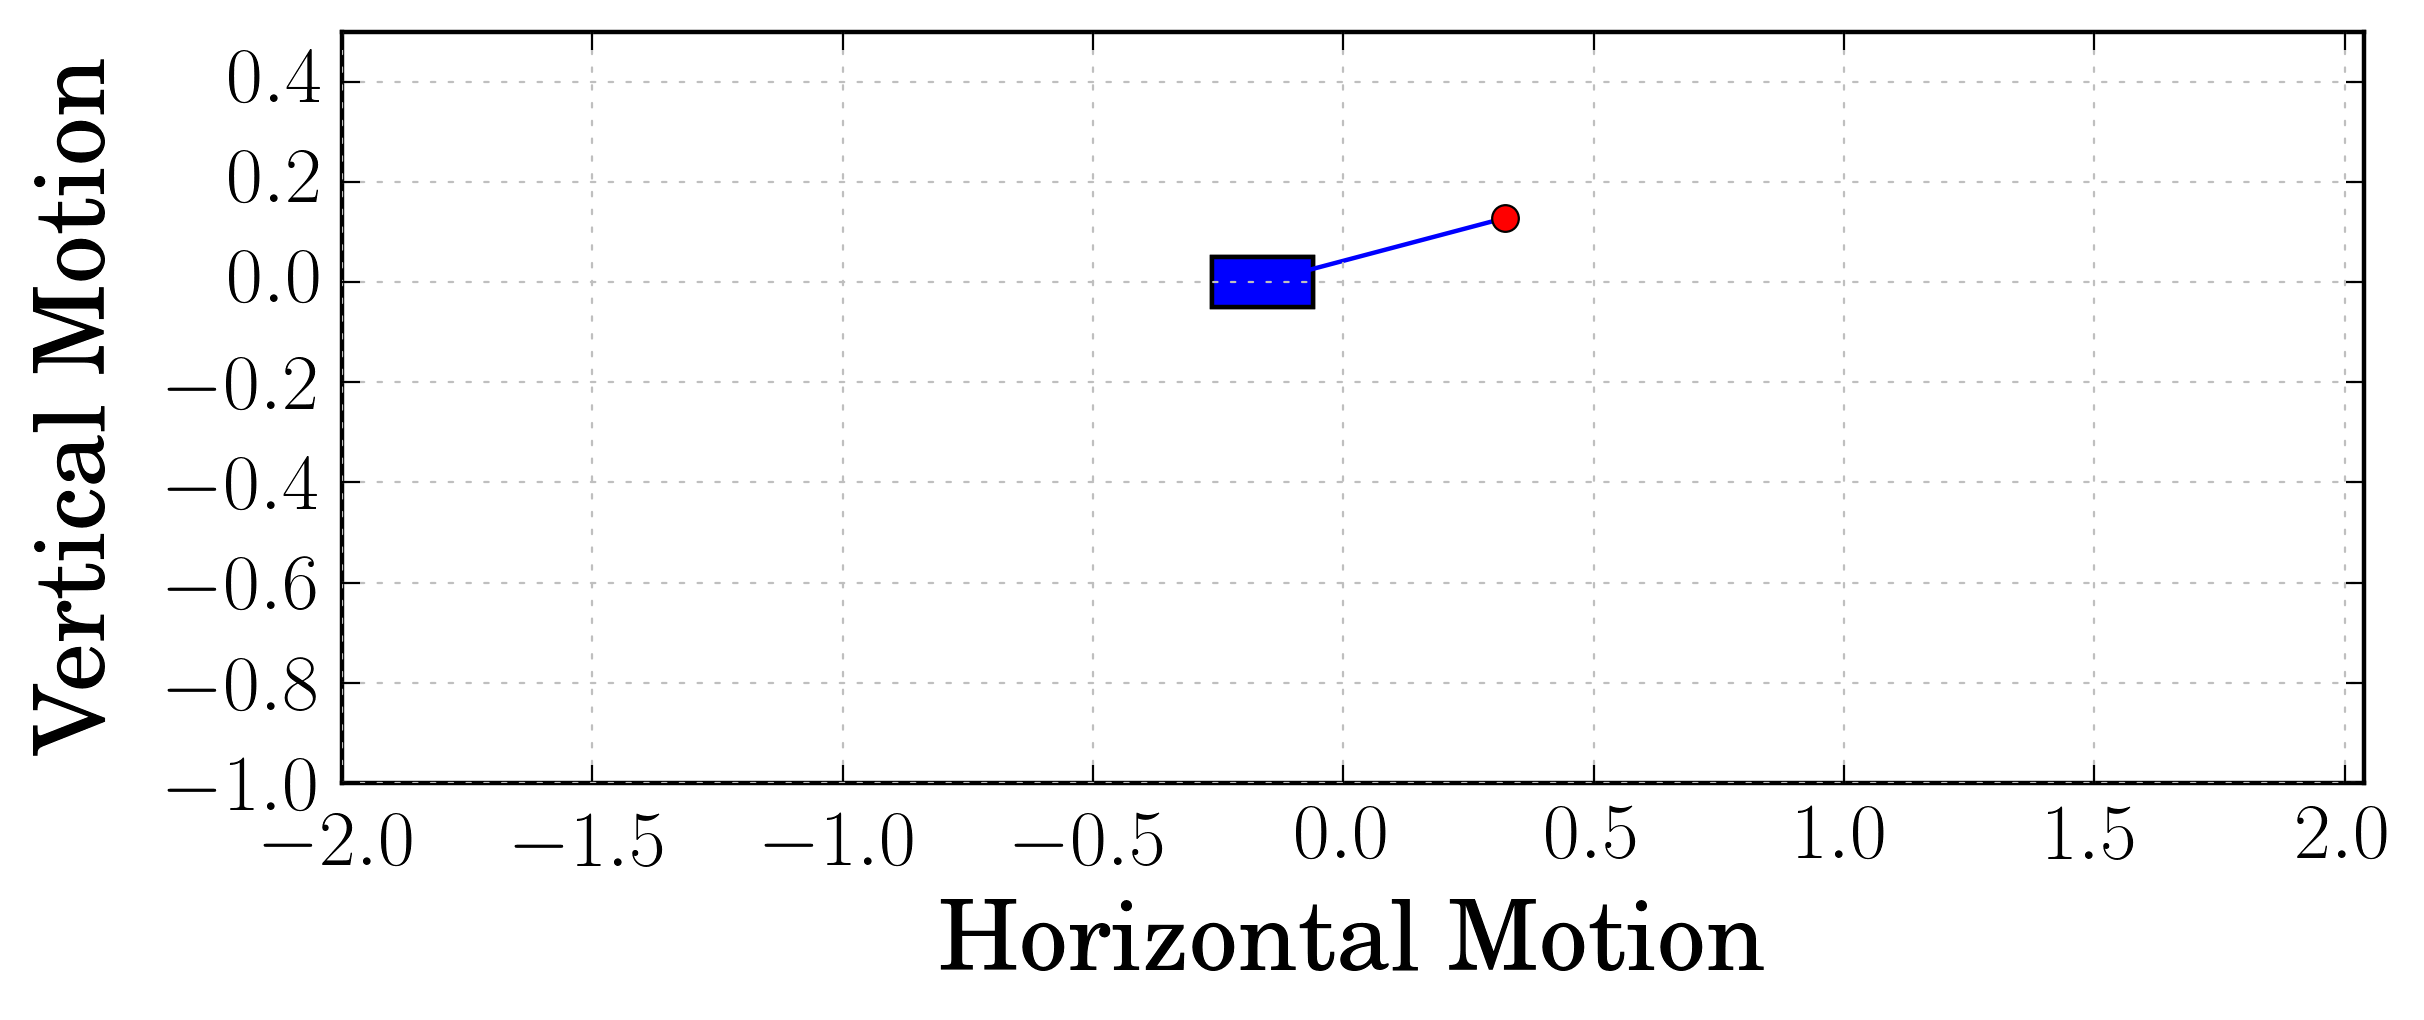

In [2]:
resp = np.load('/Users/forrest/Desktop/temp.npy')
Length1 = 0.5
runtime = 10
# What frame per second?
fps = 30

x_resp = resp[:,0]
# y_resp = resp[:,1]
beta_resp = resp[:,1]

# For the cables and top of rectangle
pen1_x =Length1*np.sin(beta_resp) + x_resp
pen1_y = -Length1*np.cos(beta_resp)

# pen2_x = (Length1*np.sin(beta_resp) + Length2*np.sin(theta_resp) + x_resp)
# pen2_y = (-Length1*np.cos(beta_resp) - Length2*np.cos(theta_resp) + y_resp)

# pen3_x = (Length1*np.sin(beta_resp) + Length2*np.sin(theta_resp) + Length3*np.sin(gamma_resp) + x_resp)
# pen3_y = (-Length1*np.cos(beta_resp) - Length2*np.cos(theta_resp) - Length3*np.cos(gamma_resp) + y_resp)

import matplotlib.animation as animation
import matplotlib.pyplot as plt
# Change some plot properties to make the video work and look better
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
mpl.rcParams['savefig.dpi'] = 160
mpl.rcParams['savefig.bbox'] = 'standard'
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot(111, aspect='equal')
plt.ylim(-1,0.5)
# plt.xlim(-x_resp[0]-1, x_resp[0]+1.2)
plt.xlim(x_resp[0]-2.0, x_resp[-1]+0.2+2.0)
plt.xlabel('Horizontal Motion', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Vertical Motion', fontsize=22, weight='bold', labelpad=10)
# plt.axes().set_aspect('equal')

# leftcable, = plt.plot([],[], linewidth=0.5, linestyle = '-',
#                       label='leftcable', color='b')
# rightcable, = plt.plot([],[], linewidth=0.5, linestyle = '-',
#                        label='rightcable', color='b')
# barLine, = plt.plot([],[], linewidth=2, linestyle = '-', label='Bar')
patch = patches.Rectangle((0, 0), 0, 0, angle=0)
first_rod, = plt.plot([],[], linewidth=1, linestyle = '-',
                      label='leftcable', color='b')
# second_rod, = plt.plot([],[], linewidth=1, linestyle = '-',
#                       label='leftcable', color='b')
# third_rod, = plt.plot([],[], linewidth=1, linestyle = '-',
#                       label='leftcable', color='b')
dotP1, = plt.plot([],[], 'ro', label='Center of Gravity')
# dotP2, = plt.plot([],[], 'ro', label='Center of Gravity')
# dotP3, = plt.plot([],[], 'ro', label='Center of Gravity')
# rod,    = plt.plot([],[], linewidth=6, linestyle = '-', label='rod',
#                    color='r')

def init():
    """ Initialize the lines in the plot """
    first_rod.set_data([], [])
#     second_rod.set_data([], [])
#     third_rod.set_data([], [])
    dotP1.set_data([],[])
#     dotP2.set_data([],[])
#     dotP3.set_data([],[])
    ax.add_patch(patch)
#     rod.set_data([],[])

    return first_rod, dotP1, patch,

def animate_un(i):
    """ Update the plot for frame i """
    if not (i % 30): # print notice every 30th frame
        print('Processing frame {}'.format(i))

    first_rod.set_data([x_resp[i], pen1_x[i]], [0, pen1_y[i]])
#     second_rod.set_data([pen1_x[i], pen2_x[i]], [pen1_y[i], pen2_y[i]])
#     third_rod.set_data([pen2_x[i], pen3_x[i]], [pen2_y[i], pen3_y[i]])
    dotP1.set_data([[pen1_x[i]],[pen1_y[i]]])
#     dotP2.set_data([[pen2_x[i]],[pen2_y[i]]])
#     dotP3.set_data([[pen3_x[i]],[pen3_y[i]]])
    patch.set_width(0.2)
    patch.set_height(0.1)
    patch.set_xy([x_resp[i]-0.1, 0-0.05])
    patch._angle = np.rad2deg(0)
#     plt.xlim(x_resp[i]-2.0, x_resp[i]+0.2+2.0)

    return first_rod, dotP1, patch,

ani_un = animation.FuncAnimation(fig, animate_un, interval = fps,
        frames = runtime*fps, blit = True, init_func = init)

ani_un.save('/Users/forrest/Desktop/{}.mp4'.format('cart_pen'), bitrate = 2500, fps = fps)